# Catatan Kerja Praktikum
<table align="left">
    <tr>
        <td style="text-align:left">Kode Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">10S3001</td>
    </tr>
    <tr>
        <td style="text-align:left">Nama Mata Kuliah</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left">Kecerdasan Buatan</td>
    </tr>
    <tr>
        <td style="text-align:left">Topik</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>K-Means dan Neural Network
</i></td>
    </tr>
    <tr>
        <td style="text-align:left">NIM</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>12S20036</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Nama</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Winda Sari Butarbutar</i></td>
    </tr>
    <tr>
        <td style="text-align:left">NIM</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>12S20053</i></td>
    </tr>
    <tr>
        <td style="text-align:left">Nama</td>
        <td style="text-align:left">:</td>
        <td style="text-align:left"><i>Andri A. Hutapea</i></td>
    </tr>
</table>

## Daftar Isi

- [_Clustering using K-Means with scikit-learn_](#Assignment)

### <a class="anchor" id="Assignment -">Assignment - <i> Clustering using K-Means with scikit-learn</i></a>

Clustering using K-Means with scikit-learn

In [57]:
#importing required libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Digunakan untuk membaca data dan melihat 5 baris pertama

In [58]:
#reading the data and looking at the first five roes of the data
data = pd.read_csv('D:\TEST\HasilSurvey.csv')
data.head()

,minat belajar meningkat ketika peralihan dari pembelajaran online ke offline,MinatBelajar.I,Faktor utama,FaktorUtama_I,Metode belajar apa yang paling anda minati?,MetodeBelajar_I
0,iya,1,Lingkungan yang kurang nyaman,2,"Metode belajar SQ3R(survey, question, read, re...",3
1,iya,1,Pengaruh penggunaan gadet,1,"Metode belajar SQ3R(survey, question, read, re...",3
2,tidak,0,Pengaruh penggunaan gadet,1,"Metode belajar SQ3R(survey, question, read, re...",3
3,iya,1,Pengaruh penggunaan gadet,1,Metode belajar mind mapping (mencatat dengan k...,1
4,iya,1,Minat atau bakat yang tidak sesuai,0,Metode belajar mind mapping (mencatat dengan k...,1


Keterangan :
1. dataset dengan nama file HasilSurvey.csv akan dibaca atau diinisialisasi.Sehingga akan menampilkan tabel dari data, 
2. fungsi data.head() akan menampilkan 5 baris teratas dari data.

Mari kita pilih tiga variabel pada data "FaktorUtama_I" and “MetodeBelajar_I” 

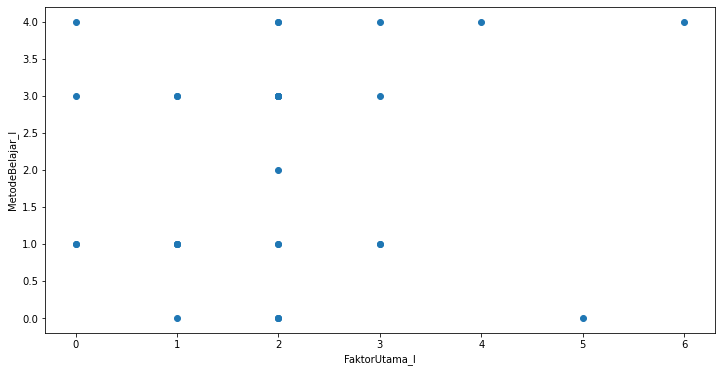

In [59]:
X = data[["FaktorUtama_I","MetodeBelajar_I"]]

#Visualise data points
plt.figure(figsize=(12,6))
plt.scatter(X["FaktorUtama_I"], X["MetodeBelajar_I"])
plt.xlabel('FaktorUtama_I')
plt.ylabel('MetodeBelajar_I')
plt.show()               

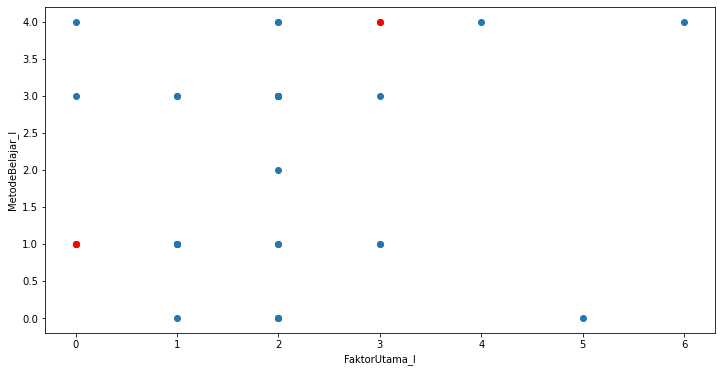

In [66]:
#number of clusters
K=2

#Select random observation as centroids
Centroids = (X.sample(n=K))
plt.figure(figsize=(12,6))
plt.scatter(X["FaktorUtama_I"], X["MetodeBelajar_I"])
plt.scatter(Centroids["FaktorUtama_I"], Centroids["MetodeBelajar_I"], c='red')
plt.xlabel ('FaktorUtama_I')
plt.ylabel('MetodeBelajar_I')
plt.show() 

Menggunakan FaktorUtama dan MetodeBelajar

In [67]:
sltd_data = data[["FaktorUtama_I", "MetodeBelajar_I"]]

# statistics of the data
sltd_data.describe

<bound method NDFrame.describe of     FaktorUtama_I  MetodeBelajar_I
0               2                3
1               1                3
2               1                3
3               1                1
4               0                1
5               2                1
6               3                1
7               1                0
8               2                3
9               2                4
10              2                0
11              1                1
12              2                3
13              2                3
14              3                4
15              4                4
16              2                3
17              5                0
18              3                3
19              2                1
20              0                3
21              2                0
22              2                4
23              0                1
24              1                1
25              0                4
26              2    

Selanjutnya, mari kita baca datanya dan lihat lima baris pertama. 

In [68]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(sltd_data)

#statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,3.300000e+01,3.300000e+01
mean,-5.467007e-18,1.009294e-16
std,1.015505e+00,1.015505e+00
min,-1.490389e+00,-1.492961e+00
25%,-7.219070e-01,-7.789362e-01
50%,4.657464e-02,6.491135e-01
75%,4.657464e-02,6.491135e-01
max,3.120501e+00,1.363138e+00


Mari memvisualisasikan data yang dinormalisasi dengan scatter plot.

(-4.0, 5.0)

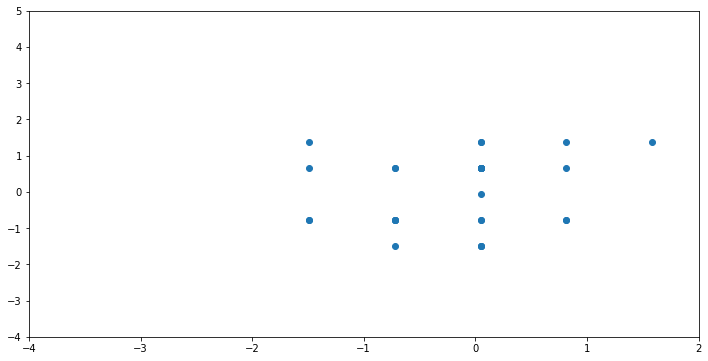

In [69]:
#create sccatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[:,0], data_scaled[:,1])
plt.xlim(-4,2)
plt.ylim(-4,5)

Besarannya terlihat serupa sekarang. Selanjutnya, mari buat fungsi kmeans dan paskan pada data.

In [70]:
#defining the kmeans function with initialization as random
kmeans = KMeans(n_clusters=2, init='random')

#fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(init='random', n_clusters=2)

In [71]:
#save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

Mari kita evaluasi seberapa baik cluster yang terbentuk. Untuk melakukan itu, kita akan menghitung inersia dari cluster.

In [72]:
# inertia on the fitted data
kmeans.inertia_

36.870566263747456

Memasang beberapa algoritme k-means dan menyimpan nilai dalam daftar kosong, dan mengonversi hasilnya menjadi kerangka data dan memplotnya

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Win10\AppData\Local\Temp\ipykernel_8756\1475071236.py:5: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
C:\Users\Win10\AppData\Local\Temp\ipykernel_8756\1475071236.py:5: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
C:\Users\Win10\AppData\Local\Temp\ipykernel_8756\1475071236.py:5: ConvergenceWarning: Number of distinct clusters (17) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  kmeans.fit(data_scaled)
C:\Users\Win10\AppData\Local\Temp\ipykernel_8756\147

Text(0, 0.5, 'Inertia')

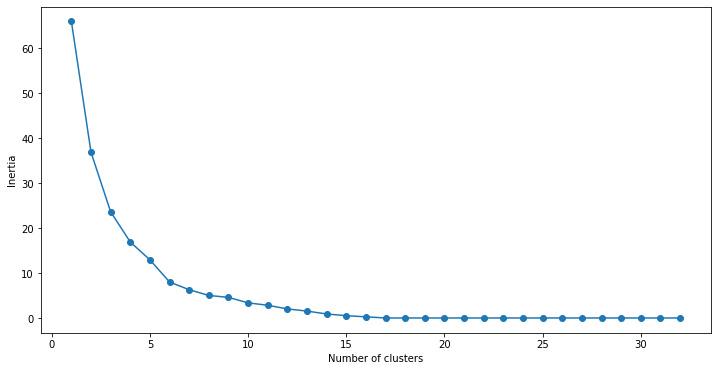

In [73]:
#fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,33):
    kmeans = KMeans( n_clusters = cluster, init='random')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)
    
 #converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,33), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Cluster Optimal dari Plot

In [74]:
# k means using 3 clusters and random initialization
kmeans = KMeans( n_clusters = 3, init='random')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Jumlah nilai poin di masing-masing cluster yang terbentuk di atas.

In [75]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    16
1    14
0     3
Name: cluster, dtype: int64

 K-Means Clustering dengan Python.

In [76]:
# inertia on the fitted data
kmeans.inertia_

23.62605845756312

Memvisualisasikan data

In [77]:
# save new clusters for chart
y_km = kmeans.fit_predict(data_scaled)

(-4.0, 5.0)

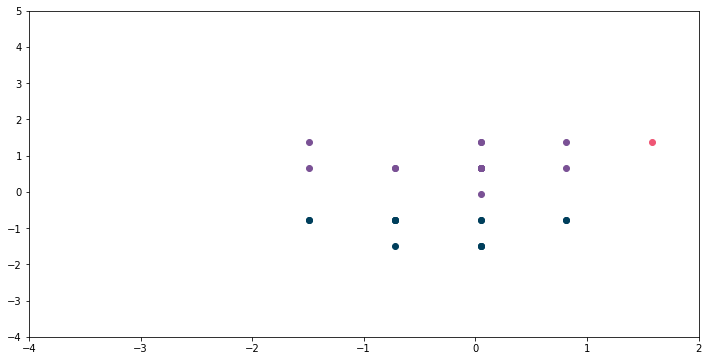

In [78]:
# create scatter plot
plt.figure(figsize=(12,6))
plt.scatter(data_scaled[y_km ==0,0], data_scaled[y_km == 0,1], c='#003f5c')
plt.scatter(data_scaled[y_km ==1,0], data_scaled[y_km == 1,1], c='#7a5195')
plt.scatter(data_scaled[y_km ==2,0], data_scaled[y_km == 2,1], c='#ef5675')
plt.xlim(-4,2)
plt.ylim(-4,5)

TERIMAKASIH